In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
del df['petal width (cm)']

In [13]:
del df['petal length (cm)']

In [14]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


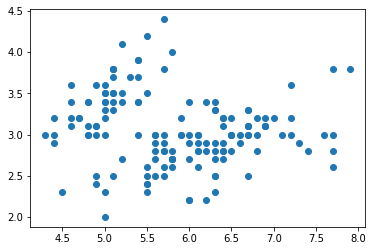

In [15]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [30]:
scaler=MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)']=scaler.transform(df[['sepal length (cm)']])

In [32]:
scaler=MinMaxScaler()
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)']=scaler.transform(df[['sepal width (cm)']])

In [41]:
k_rng=range(1,20)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

In [42]:
sse

[12.797757201646089,
 6.8552905260332775,
 4.115194202754065,
 3.2174838565233785,
 2.5605068621416986,
 2.103810285728445,
 1.8189617285833084,
 1.5474600878159903,
 1.2688256922081356,
 1.1157116183129432,
 0.959529194417573,
 0.8477372454516805,
 0.7866052786391807,
 0.710410560646969,
 0.6878519952095272,
 0.6230425724274983,
 0.5830801351124064,
 0.5320209716766429,
 0.5072043252743484]

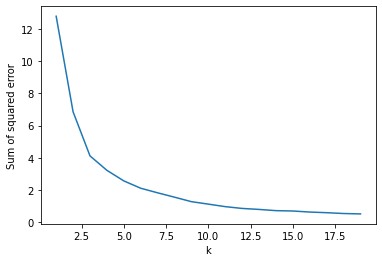

In [43]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [44]:
# Elbow is created on the arond the 3. so k=3

In [45]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [46]:
y_predicted=km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [47]:
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


In [48]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

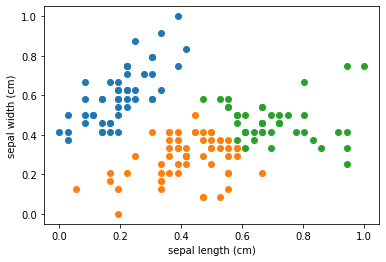

In [49]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()